In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
x = df.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# K-Means Cluster

In [7]:
from sklearn.cluster import KMeans

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


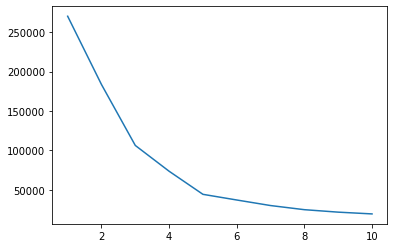

In [10]:
# Within-Cluster-Sum-of-Squares (WCSS) calculation

wcss = []
for i in range(1,11):
    kmeans =  KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)     \
    

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
kmeans

KMeans(n_clusters=5)

In [12]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4,
       1, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 0, 4, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df_combined = pd.concat([df, pd.DataFrame(y_kmeans)], axis=1)
df_combined.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1
5,6,Female,22,17,76,2
6,7,Female,35,18,6,1
7,8,Female,23,18,94,2
8,9,Male,64,19,3,1
9,10,Female,30,19,72,2


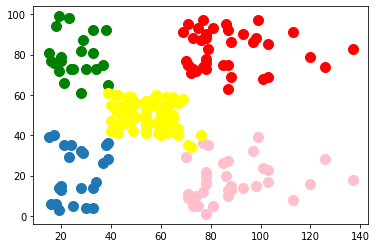

In [23]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans ==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100,label='Cluster2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],s = 100, c='green',label ='Cluster3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1],s = 100, c='pink',label ='Cluster4')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1],s = 100, c='yellow',label ='Cluster5')

plt.show()

In [26]:
df_combined.to_csv('New_Kmean_Cluster_Analysis.csv')

# Hierarchical Clustering

In [29]:
import scipy.cluster.hierarchy as sch

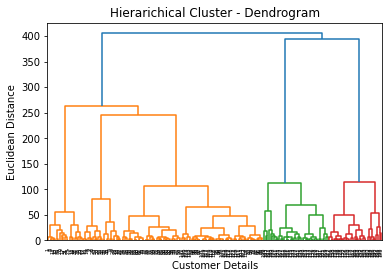

In [30]:
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Hierarichical Cluster - Dendrogram')
plt.xlabel('Customer Details')
plt.ylabel('Euclidean Distance')
plt.show()

# AgglomerativeClustering

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

In [34]:
y_hc = hc.fit_predict(x)
y_hc 

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [35]:
combined_1 = pd.concat([df,pd.DataFrame(y_hc)], axis=1)
combined_1.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


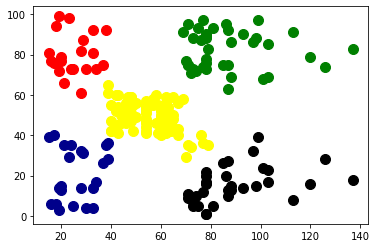

In [36]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1],s=100,c='black',label='H_Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1],s=100,c='yellow',label='H_Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1],s=100,c='green',label='H_Cluster3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1],s=100,c='red',label='H_Cluster4')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1],s=100,c='darkblue',label='H_Cluster5')

In [37]:
combined_1.to_csv("H_Cluster.csv")